# __EDA notebook: Capstone ane.energy__

---
---

## __Basics__

---

### __Import libraries and tools__

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

---

### __Load datasets__

In [2]:
ohr_solar=pd.read_csv("../data/onlinehochrechnung_solar_mw.csv")

In [3]:
ohr_woff=pd.read_csv("../data/onlinehochrechnung_windoffshore_mw.csv", sep='///')

In [4]:
ohr_won=pd.read_csv("../data/onlinehochrechnung_windonshore_mw.csv", header=None)

In [5]:
speedy=pd.read_csv('../data/einspeisedaten_gen_wind_speed.csv')

In [6]:
regel_results=pd.read_csv('../data/regelleistung_aggr_results.csv')

In [7]:
regel_demand=pd.read_csv('../data/regelleistung_demand.csv')

---
---

## __Overview over datasets__

---

### __Solar dataset__

In [ ]:
ohr_solar.head()

In [ ]:
ohr_solar['dt_start_utc'].min()

In [ ]:
ohr_solar['dt_start_utc'].max()

In [ ]:
ohr_solar.describe().transpose()

In [ ]:
ohr_solar.shape

In [ ]:
ohr_solar.info()

---

#### __Check for null and nan values__

In [ ]:
ohr_solar.isnull().sum()

In [ ]:
ohr_solar.isna().sum()

---

#### __Get an understanding of the columns__

In [ ]:
ohr_solar.columns

In [ ]:
sns.pairplot(ohr_solar)

---

### __Onshore dataset__

In [ ]:
ohr_won.head()

In [ ]:
ohr_won[0].min()

In [ ]:
ohr_won[0].max()

In [ ]:
ohr_won.describe().transpose()

In [ ]:
ohr_won.shape

In [ ]:
ohr_won.info()

---

#### __Check for nan and null values__

In [ ]:
ohr_won.isna().sum()

In [ ]:
ohr_won.isnull().sum()

---

#### __Get an understanding of the columns__

In [ ]:
ohr_won.columns

In [ ]:
sns.pairplot(ohr_won)

---

### __Offshore dataset__

In [ ]:
ohr_woff.head(20)

In [ ]:
ohr_woff['dt_start_utc'].min()

In [ ]:
ohr_woff['dt_start_utc'].max()

In [ ]:
ohr_woff.describe().transpose()

In [ ]:
ohr_woff.describe

In [ ]:
ohr_woff.shape

In [ ]:
ohr_woff.info()

---

#### __Check for nan and null values__

In [ ]:
ohr_woff.isna().sum()

In [ ]:
ohr_woff.isnull().sum()

Delete the null and nan columns

In [ ]:
ohr_woff = ohr_woff.drop(['amprion', 'transnetbw'], axis = 1)

---

#### __Get an understanding of the columns__

In [ ]:
ohr_woff.columns

In [ ]:
sns.pairplot(ohr_woff)

---

### __Wind speed__

In [ ]:
speedy.head(388)

* 385 values per hour of the timestemp
* 6,548,085 rows, divided by the number of a normal year = 17,008.013 rows
* 708,667 days between 31.12.2018 and 30.09.2020 
* want to create a mean or median of the 385 values of 1h to compare and merge it with the onshore, offshore and solar csv

In [ ]:
speedy.head()

In [ ]:
speedy['dt_start_utc'].max()

In [ ]:
speedy['dt_start_utc'].min()

In [ ]:
speedy.describe().transpose()

In [ ]:
speedy.isna().sum()

In [ ]:
speedy.info

---

### __Regelleistung aggregated results__

In [15]:
regel_results.head()

,date_start,date_end,product,reserve_type,total_min_capacity_price_eur_mw,total_average_capacity_price_eur_mw,total_marginal_capacity_price_eur_mw,total_min_energy_price_eur_mwh,total_average_energy_price_eur_mwh,total_marginal_energy_price_eur_mwh,germany_min_capacity_price_eur_mw,germany_average_capacity_price_eur_mw,germany_marginal_capacity_price_eur_mw,germany_min_energy_price_eur_mwh,germany_average_energy_price_eur_mwh,germany_marginal_energy_price_eur_mwh,germany_import_export_mw
0,2019-01-01,2019-01-01,NEG_00_04,MRL,0.0,150.81,872.262,1.000,-371.64,-18422.000,0.0,150.81,872.262,1.000,-371.64,-18422.000,0
1,2019-01-01,2019-01-01,NEG_00_04,SRL,0.0,88.82,146.420,11.000,-79.74,-449.659,0.0,88.82,146.420,11.000,-79.74,-449.659,0
2,2019-01-01,2019-01-01,NEG_04_08,MRL,0.0,72.12,236.842,52.278,-179.30,-4989.000,0.0,72.12,236.842,52.278,-179.30,-4989.000,0
3,2019-01-01,2019-01-01,NEG_04_08,SRL,0.0,86.05,160.760,11.000,-79.87,-500.000,0.0,86.05,160.760,11.000,-79.87,-500.000,0
4,2019-01-01,2019-01-01,NEG_08_12,MRL,0.0,14.76,70.000,1.000,-264.63,-2470.000,0.0,14.76,70.000,1.000,-264.63,-2470.000,0


In [ ]:
regel_results.info()

In [47]:
regel_results.shape

(16068, 17)

In [16]:
regel_results.isna().sum()

date_start                                  0
date_end                                    0
product                                     0
reserve_type                                0
total_min_capacity_price_eur_mw             0
total_average_capacity_price_eur_mw         0
total_marginal_capacity_price_eur_mw        0
total_min_energy_price_eur_mwh            240
total_average_energy_price_eur_mwh        240
total_marginal_energy_price_eur_mwh       240
germany_min_capacity_price_eur_mw           0
germany_average_capacity_price_eur_mw       0
germany_marginal_capacity_price_eur_mw      0
germany_min_energy_price_eur_mwh          240
germany_average_energy_price_eur_mwh      240
germany_marginal_energy_price_eur_mwh     240
germany_import_export_mw                    0
dtype: int64

In [17]:
regel_results.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_min_capacity_price_eur_mw,16068.0,0.357014,1.586713,0.0,0.0000,0.000,0.0000,31.87
total_average_capacity_price_eur_mw,16068.0,11.983400,60.308900,0.0,0.5800,4.410,11.7800,5375.26
total_marginal_capacity_price_eur_mw,16068.0,36.466545,891.231948,0.0,2.0000,8.138,18.4000,99900.00
total_min_energy_price_eur_mwh,15828.0,37.125926,48.575562,-55.0,11.5650,36.000,60.0000,3500.00
total_average_energy_price_eur_mwh,15828.0,49.157829,2040.750022,-47880.0,-411.3975,40.700,654.2975,32466.80
total_marginal_energy_price_eur_mwh,15828.0,1005.782543,29970.177707,-99999.0,-1940.0000,30.050,9848.0000,99999.00
germany_min_capacity_price_eur_mw,16068.0,0.399128,1.774616,0.0,0.0000,0.000,0.0000,31.87
germany_average_capacity_price_eur_mw,16068.0,12.095214,60.416618,0.0,0.5900,4.460,11.8800,5375.26
germany_marginal_capacity_price_eur_mw,16068.0,36.433738,891.232577,0.0,2.0000,8.110,18.3600,99900.00
germany_min_energy_price_eur_mwh,15828.0,36.924757,42.628876,-55.0,11.0000,36.000,60.0075,3500.00


In [ ]:
regel_results.corr()

,total_min_capacity_price_eur_mw,total_average_capacity_price_eur_mw,total_marginal_capacity_price_eur_mw,total_min_energy_price_eur_mwh,total_average_energy_price_eur_mwh,total_marginal_energy_price_eur_mwh,germany_min_capacity_price_eur_mw,germany_average_capacity_price_eur_mw,germany_marginal_capacity_price_eur_mw,germany_min_energy_price_eur_mwh,germany_average_energy_price_eur_mwh,germany_marginal_energy_price_eur_mwh,germany_import_export_mw
total_min_capacity_price_eur_mw,1.000000,0.068725,0.002269,0.043238,0.008192,-0.000717,0.926527,0.068287,0.002257,0.050261,0.008019,-0.000744,0.047402
total_average_capacity_price_eur_mw,0.068725,1.000000,0.455534,0.020150,0.023353,0.027048,0.066028,0.999883,0.455535,0.023387,0.023152,0.027026,0.418305
total_marginal_capacity_price_eur_mw,0.002269,0.455534,1.000000,0.006974,0.010216,0.032634,0.001895,0.455970,1.000000,0.008089,0.010146,0.032633,0.118133
total_min_energy_price_eur_mwh,0.043238,0.020150,0.006974,1.000000,0.357828,0.287106,0.043100,0.020053,0.006971,0.869863,0.356890,0.286943,0.017590
total_average_energy_price_eur_mwh,0.008192,0.023353,0.010216,0.357828,1.000000,0.643551,0.008099,0.023040,0.010208,0.416088,0.999677,0.643413,-0.000933
total_marginal_energy_price_eur_mwh,-0.000717,0.027048,0.032634,0.287106,0.643551,1.000000,-0.000776,0.026859,0.032633,0.330728,0.641038,0.999980,0.002057
germany_min_capacity_price_eur_mw,0.926527,0.066028,0.001895,0.043100,0.008099,-0.000776,1.000000,0.065815,0.001853,0.050065,0.007928,-0.000803,0.041701
germany_average_capacity_price_eur_mw,0.068287,0.999883,0.455970,0.020053,0.023040,0.026859,0.065815,1.000000,0.455971,0.023212,0.022832,0.026838,0.415379
germany_marginal_capacity_price_eur_mw,0.002257,0.455535,1.000000,0.006971,0.010208,0.032633,0.001853,0.455971,1.000000,0.008086,0.010138,0.032631,0.118076
germany_min_energy_price_eur_mwh,0.050261,0.023387,0.008089,0.869863,0.416088,0.330728,0.050065,0.023212,0.008086,1.000000,0.415718,0.330539,0.025909


In [26]:
regel_results.min()

date_start                                2019-01-01
date_end                                  2019-01-01
product                                    NEG_00_04
reserve_type                                     MRL
total_min_capacity_price_eur_mw                  0.0
total_average_capacity_price_eur_mw              0.0
total_marginal_capacity_price_eur_mw             0.0
total_min_energy_price_eur_mwh                 -55.0
total_average_energy_price_eur_mwh          -47880.0
total_marginal_energy_price_eur_mwh         -99999.0
germany_min_capacity_price_eur_mw                0.0
germany_average_capacity_price_eur_mw            0.0
germany_marginal_capacity_price_eur_mw           0.0
germany_min_energy_price_eur_mwh               -55.0
germany_average_energy_price_eur_mwh        -47880.0
germany_marginal_energy_price_eur_mwh       -99999.0
germany_import_export_mw                        -688
dtype: object

In [27]:
regel_results.max()

date_start                                2021-03-19
date_end                                  2021-03-19
product                                    POS_20_24
reserve_type                                     SRL
total_min_capacity_price_eur_mw                31.87
total_average_capacity_price_eur_mw          5375.26
total_marginal_capacity_price_eur_mw         99900.0
total_min_energy_price_eur_mwh                3500.0
total_average_energy_price_eur_mwh           32466.8
total_marginal_energy_price_eur_mwh          99999.0
germany_min_capacity_price_eur_mw              31.87
germany_average_capacity_price_eur_mw        5375.26
germany_marginal_capacity_price_eur_mw       99900.0
germany_min_energy_price_eur_mwh              3500.0
germany_average_energy_price_eur_mwh         32466.8
germany_marginal_energy_price_eur_mwh        99999.0
germany_import_export_mw                         946
dtype: object

---

### __Regelleistung Demands__

In [20]:
regel_demand.head()

,date_start,date_end,product,total_demand_mw,germany_block_demand_mw,reserve_type
0,2019-01-01,2019-01-01,NEG_00_04,1067,1067,MRL
1,2019-01-01,2019-01-01,NEG_00_04,1760,1760,SRL
2,2019-01-01,2019-01-01,NEG_04_08,1067,1067,MRL
3,2019-01-01,2019-01-01,NEG_04_08,1760,1760,SRL
4,2019-01-01,2019-01-01,NEG_08_12,1067,1067,MRL


In [21]:
regel_demand.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_demand_mw,16188.0,1564.563627,564.437860,0.0,1067.0,1770.0,1956.25,2418.0
germany_block_demand_mw,16188.0,1522.458364,515.693811,0.0,1067.0,1770.0,1952.00,2218.0


In [22]:
regel_demand.isna().sum()

date_start                 0
date_end                   0
product                    0
total_demand_mw            0
germany_block_demand_mw    0
reserve_type               0
dtype: int64

In [24]:
regel_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date_start               16188 non-null  object
 1   date_end                 16188 non-null  object
 2   product                  16188 non-null  object
 3   total_demand_mw          16188 non-null  int64 
 4   germany_block_demand_mw  16188 non-null  int64 
 5   reserve_type             16188 non-null  object
dtypes: int64(2), object(4)
memory usage: 758.9+ KB


In [25]:
regel_demand.shape

(16188, 6)

In [28]:
regel_demand.max()

date_start                 2021-03-18
date_end                   2021-03-18
product                     POS_20_24
total_demand_mw                  2418
germany_block_demand_mw          2218
reserve_type                      SRL
dtype: object

In [29]:
regel_demand.min()

date_start                 2019-01-01
date_end                   2019-01-01
product                     NEG_00_04
total_demand_mw                     0
germany_block_demand_mw             0
reserve_type                      MRL
dtype: object

In [30]:
regel_demand.corr()

,total_demand_mw,germany_block_demand_mw
total_demand_mw,1.000000,0.992661
germany_block_demand_mw,0.992661,1.000000


---

## __Columns of the datasets__

In [ ]:
ohr_solar.columns

In [ ]:
ohr_woff.columns

---

#### __Rename the last column in the Offshore dataset and delete //__

In [8]:
#ohr_woff=ohr_woff.rename(columns={'nrv//': 'nrv'})
ohr_woff=ohr_woff.rename(columns={ohr_woff.columns[3]:'nrv' })

In [ ]:
ohr_woff.head()

---

#### __Rename the unnamed columns in the Onshore dataset__

In [ ]:
ohr_won.columns

In [9]:
ohr_won=ohr_won.rename(columns={ohr_won.columns[0]: 'dt_start_utc', ohr_won.columns[1]: 'fiftyhertz', ohr_won.columns[2]:'tennet', ohr_won.columns[3]:'amprion', ohr_won.columns[4]:'transnetbw', ohr_won.columns[5]:'nrv' })

In [ ]:
ohr_won.head()

---

### __Get an understanding of the column names meaning__

---

#### __Amprion__ 

* __one of four transmission system operators in Germany__
* __extra-high-voltage network is 11,000 km long__ and transports electricity across an area that extends from Lower Saxony to the Alps. 
* __Around a third of Germany’s economic output is generated there__. 
* Also performs overarching operations for integrated grid systems in Germany and Europe
* 2 offshore wind farms: DOLWIN4 and BORWIN4 - operation start 2028

    https://www.amprion.net/

##### __Market Platform__

* Grid Losses
* Reserve Power Plants 
* Control Energy
* Interruptible Loads 

---

#### __TenneT__ 

* __one of four transmission system operators in Germany and the Netherlands__
* 27,000 high voltage pylons
* __24,000 km high-voltage network__
* 99.9999% grid availability
* Onshore and Offshore projects
* 14 total connected offshore wind farms
* 16 interconnections
* 42,000,000 end users

    https://www.tennet.eu/#&panel1-1

---

#### __Transnet BW__

* __one of four transmission system operators in Germany__: Baden-Württemberg but ensure that electricity is supplied to the region, Germany and throughout Europe
* former part of EnBW, spun off to separate company due to the European Commission's requirements for the liberalisation of the energy market
* __power grid lines of 3,200 km__
* 11,000,000 end users
* cooperation with Amprion for the __Ultranet__ grid expansion project
* cooperation with TenneT: planning and implementing __SuedLink__ wind power line (700 km, largest infrastructure project, north-south connection)



    https://www.transnetbw.de/de

##### __Link to infeed:__ 

* https://www.transnetbw.com/en/transparency/market-data/key-figures

---

#### __50Hertz__

* 50Hertz Transmission is __one of four transmission system operators in Northern and Eastern Germany__
* __power grid lines of 10,380 km__
* 18,000,000 end users
* 50Hertz is a forerunner in the field of secure integration of renewable energy: in our grid area, more than 60 percent of the electricity consumed is already generated from renewable sources – until 2032 we want to integrate 100 percent securely. 
* 2 Offshore Wind parks: Ostwind 2 (GER), Arcadis Ost 1 (Belgian Wind Park Operator Parkwind)
* Connect Arcadis Ost 1 and Baltic Eagle (both Baltic Sea)- installation of third cable system planned for 2022

---

#### __NRV NetzRegelVerbund__

* Grid Control Cooperation: innovative network control concept, by means of which the four German transmission system operators (TSOs) optimise their control energy use and the control reserve provision technically and economically through an intelligent communication between the load-frequency controllers of the TSOs
* TSOs: 50Hertz, Amprion, TenneT, Transnet BW

* https://www.regelleistung.net/apps/datacenter/activated-values/?cooperation=NRV&qualities=OPERATIONAL&qualities=ASSURED&seriesGroups=HIJQag%2BgIgohCCMAKEkBUCMBWAskA

---

### __Renewables in Europe__

Windparks:

* https://www.thewindpower.net/online_access_de.php

* https://www.thewindpower.net/store_continent_de.php?id_zone=1000

Offshore: 

* http://153.97.132.92/qgiswebclient.html?map=/var/qgis-web-client/projects/wind_farm.qgs&searchtables=search_wind&lang=de&startExtent=6.4,51.3,14.5,58.3

Offshore network overview:

* https://www.erneuerbare-energien.de/EE/Navigation/DE/Technologien/Windenergie-auf-See/Offshore-Projekte/Netzanbindungen/netzanbindungen.html

---

### __Split time stemp__

In [10]:
ohr_solar['year'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.year
ohr_solar['month'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.month
ohr_solar['day'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.day
ohr_solar['hour'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.hour
ohr_solar['minute'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.minute
ohr_solar['seconds'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.second
ohr_solar['date']=pd.to_datetime(ohr_solar['dt_start_utc']).dt.date

In [11]:
ohr_woff['year'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.year
ohr_woff['month'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.month
ohr_woff['day'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.day
ohr_woff['hour'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.hour
ohr_woff['minute'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.minute
ohr_woff['seconds'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.second

In [12]:
ohr_won['year'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.year
ohr_won['month'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.month
ohr_won['day'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.day
ohr_won['hour'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.hour
ohr_won['minute'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.minute
ohr_won['seconds'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.second
ohr_won['date']=pd.to_datetime(ohr_won['dt_start_utc']).dt.date


No solar values between 4PM and 7AM due to sun light availability in winter month. In summer between 8PM and 2AM.

In [ ]:
ohr_solar.tail(10)

In [ ]:
ohr_woff.head(10)

In [ ]:
ohr_won.head(10)

---
---

# __Plots__

---

## __Solar__

In [ ]:
ohr_solar.head()

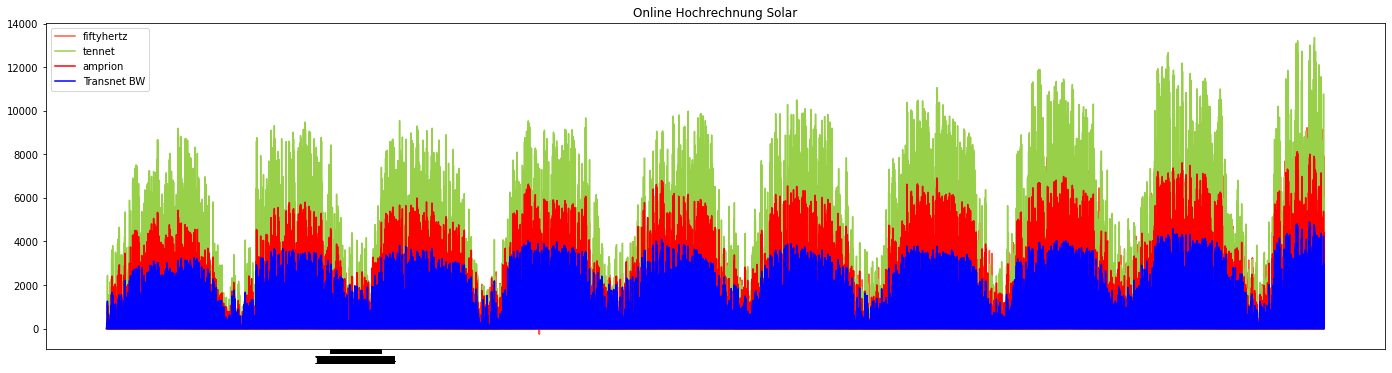

In [13]:
    # Plot the statistics
plt.figure(figsize=(24,6))
plt.plot(ohr_solar['fiftyhertz'], color='#FF5A36', label='fiftyhertz')
plt.plot(ohr_solar['tennet'], color='#99D04A',label='tennet')
plt.plot(ohr_solar['amprion'], color='red',label='amprion')
plt.plot(ohr_solar['transnetbw'], color='blue',label='Transnet BW')
plt.xticks(ohr_solar['date'])
plt.title('Online Hochrechnung Solar')
plt.legend(loc='best')    

---

## __Onshore__

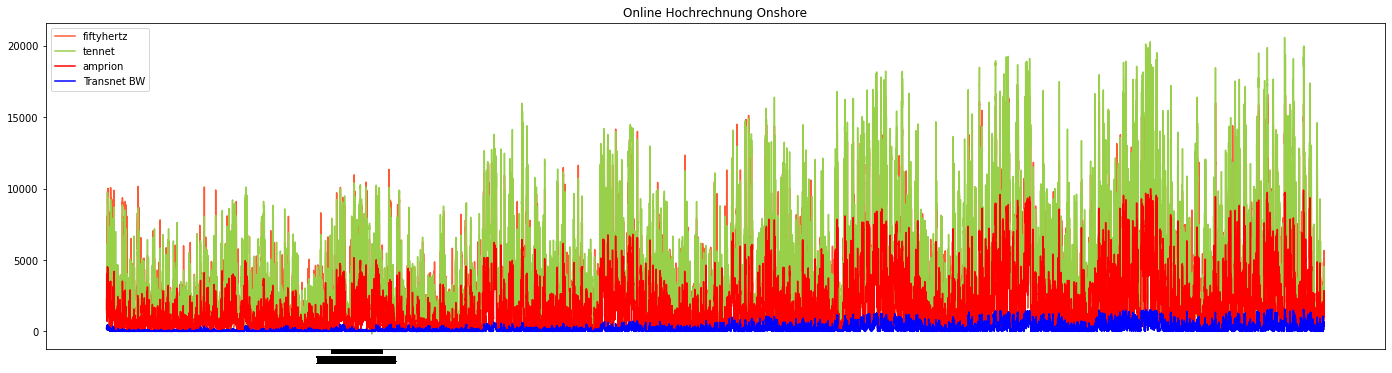

In [14]:
plt.figure(figsize=(24,6))
plt.plot(ohr_won['fiftyhertz'], color='#FF5A36', label='fiftyhertz')
plt.plot(ohr_won['tennet'], color='#99D04A',label='tennet')
plt.plot(ohr_won['amprion'], color='red',label='amprion')
plt.plot(ohr_won['transnetbw'], color='blue',label='Transnet BW')
plt.xticks(ohr_won['date'])
plt.title('Online Hochrechnung Onshore')
plt.legend(loc='best') 

---

## __Regelleistung agg. results__

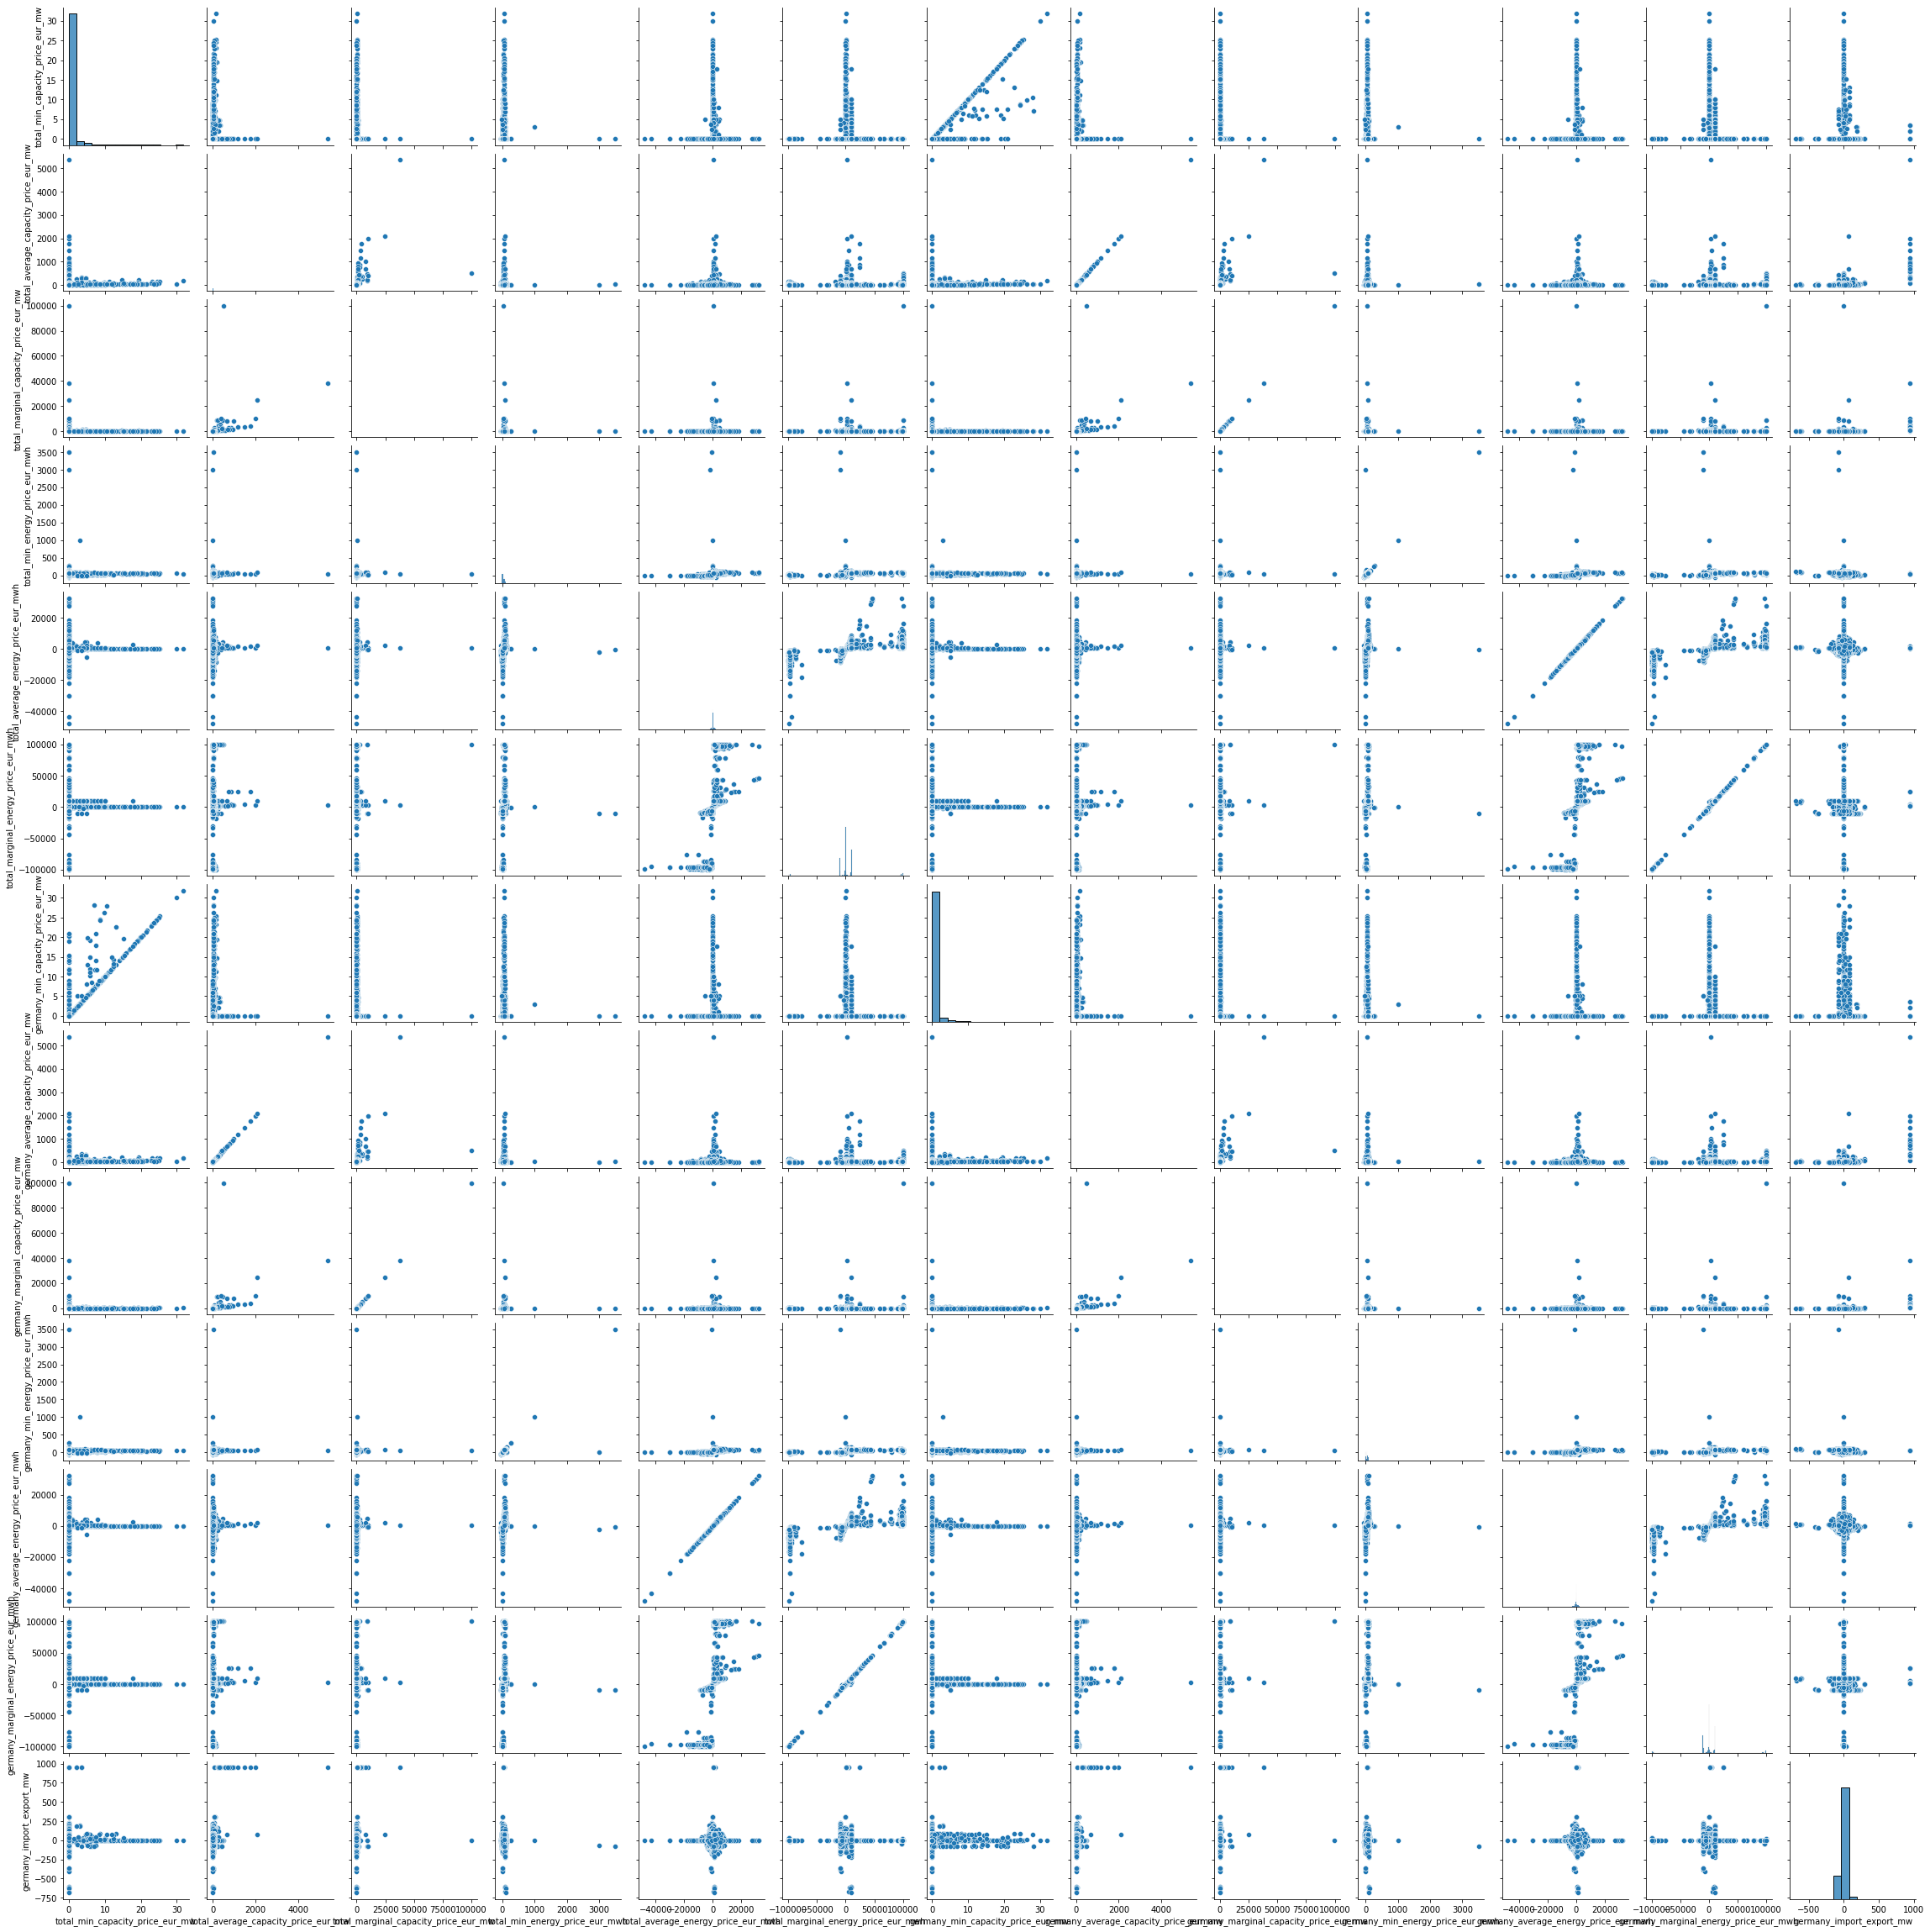

In [35]:
sns.pairplot(regel_results)

---

## __Regelleistung Demand__

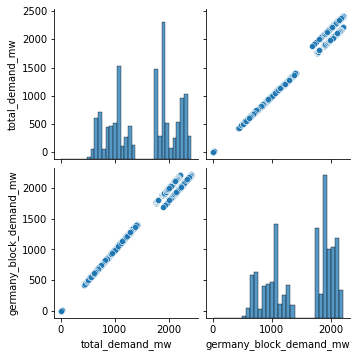

In [32]:
sns.pairplot(regel_demand)

---

## __Wind__

In [ ]:
speedy['dt_start_utc']=pd.to_datetime(speedy['dt_start_utc'])

In [ ]:
speedy_groupby=speedy.groupby(by='dt_start_utc').median()

In [ ]:
speedy_groupby.head()

In [ ]:
speedy_groupby.isnull().sum()

In [ ]:
speedy_groupby=speedy_groupby.reset_index()

In [ ]:
speedy_groupby['hours']=speedy_groupby['dt_start_utc'].dt.hour

In [ ]:
speedy_groupby.head(20)

In [ ]:
speedy_groupby['day']=speedy_groupby['dt_start_utc'].dt.to_period('D')

In [ ]:
speedy_groupby.head()

In [ ]:
speedy_groupby.drop(['dt_start_utc','voronoi_area_id'], axis=1, inplace=True)

In [ ]:
speedy_groupby.head(20)

In [ ]:
speedy_groupby_hour=speedy_groupby.groupby(['day','hours']).median()

In [ ]:
speedy_groupby_hour.head(30)

In [ ]:
speedy_groupby_hour=speedy_groupby_hour.reset_index()

In [ ]:
speedy_groupby_hour

In [ ]:
speedy_groupby_hour['day'] = speedy_groupby_hour['day'].astype('str')
speedy_groupby_hour['hours'] = speedy_groupby_hour['hours'].astype('str')

In [ ]:
speedy_groupby_hour['date'] = speedy_groupby_hour['day'] + ' ' + speedy_groupby_hour['hours']

In [ ]:
speedy_groupby_hour

In [ ]:
speedy_groupby_hour.drop(['day', 'hours'], axis=1, inplace=True)

In [ ]:
speedy_groupby_hour

In [ ]:
plt.figure(figsize=(14,6))
#plt.plot(speedy_groupby_hour)

In [ ]:
speedy_groupby_hour = speedy_groupby_hour.reset_index()

In [ ]:
#speedy_groupby_hour['date'] = pd.to_datetime(speedy_groupby_hour['date'])

In [ ]:
# Check decomposition of trend, seasonality and residue of original time series
plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(x=speedy_groupby_hour['windspeed_ms'], 
                                   model='additive',
                                   period=30)


decomposition.observed.plot(c='black')


In [ ]:
# Check decomposition of trend, seasonality and residue of original time series
decomposition = seasonal_decompose(x=speedy_groupby_hour['windspeed_ms'], 
                                   model='additive',
                                   period=30)


fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c='black', ax=ax[0])
ax[0].set(title='Close')
decomposition.trend.plot(c='blue', ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c='red', ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c='green', ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

In [ ]:
speedy_groupby_hour

In [ ]:
speedy_short['windspeed_ms'].median()

get the hourly data to 1 median

In [ ]:
speedy_med=speedy.groupby(np.arange(len(speedy))//386).median()

In [ ]:
speedy_med

In [ ]:
speedy.tail()

In [ ]:
speedy.shape

In [ ]:
speedy.isnull().sum()

In [ ]:
speedy.isna().sum()

In [ ]:
speedy.describe().transpose()

In [ ]:
speedy.head()

In [ ]:
speedy_med.head()

In [ ]:
speedy['total'] = speedy.loc[speedy['voronoi_area_id'] < 110].mean(axis=1)

In [ ]:
speedy.head()

In [ ]:
speedy.mean(axis='columns')

In [ ]:
speedy_min=speedy.groupby(np.arange(len(speedy))//385).min()

In [ ]:
speedy_min.head()

In [ ]:
speedy_min.shape

In [ ]:
speedy_max=speedy.groupby(np.arange(len(speedy))//385).max()

In [ ]:
speedy_max.head()

___

## __CSV combinations__

---

### __Regelleistung Demand and Regelleistung aggr results__

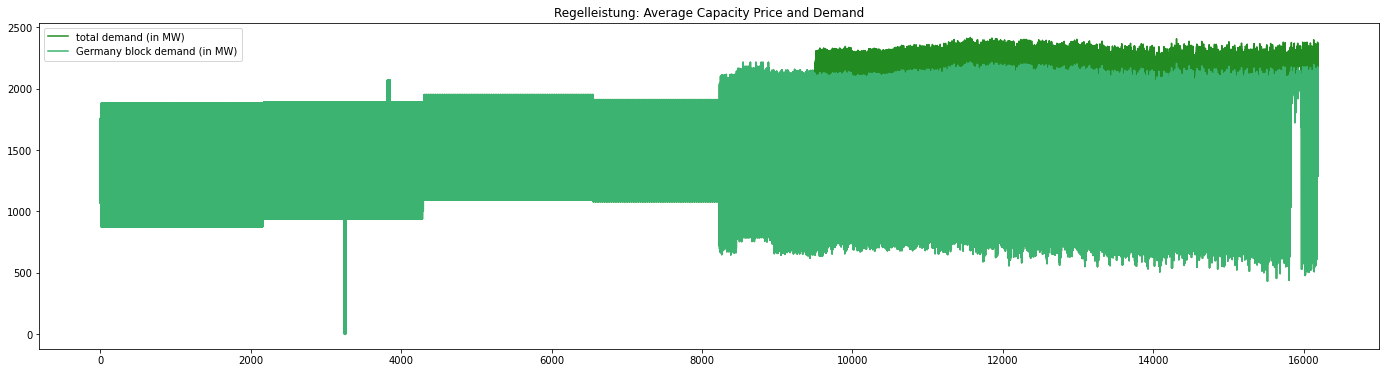

In [45]:
plt.figure(figsize=(24,6))

plt.plot(regel_demand['total_demand_mw'], color='forestgreen',label='total demand (in MW)')
plt.plot(regel_demand['germany_block_demand_mw'], color='mediumseagreen',label='Germany block demand (in MW)')

plt.title('Regelleistung: Average Capacity Price and Demand')
plt.legend(loc='best')   

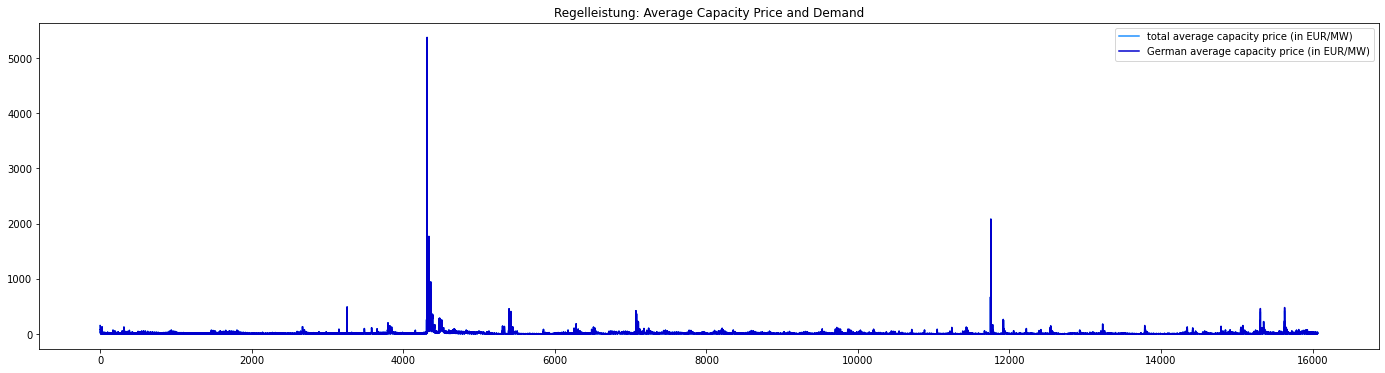

In [49]:
plt.figure(figsize=(24,6))
plt.plot(regel_results['total_average_capacity_price_eur_mw'], color='dodgerblue', label='total average capacity price (in EUR/MW)')
plt.plot(regel_results['germany_average_capacity_price_eur_mw'], color='mediumblue', label='German average capacity price (in EUR/MW)')

plt.title('Regelleistung: Average Capacity Price and Demand')
plt.legend(loc='best')  